## Task 1 – Loading the Data

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics

In [60]:
df_marketing=pd.read_csv('SalesBasedOnAdvertising.csv')

## Task 2) Analyzing and Cleaning data

#### a) Analyze the shape of the Data using df_marketing dataframe variable. Check the no. of rows and columns available.


In [8]:
df_marketing.shape

(204, 5)

#### b) Print the top 5 rows and check the values.


In [9]:
df_marketing.head()

,Sno,TV,radio,newspaper,sales
0,1,219.0,NaN,34.5,48.9
1,2,230.1,37.8,69.2,22.1
2,3,44.5,39.3,45.1,10.4
3,4,17.2,45.9,69.3,9.3
4,5,151.5,41.3,58.5,18.5


#### c) Verify the data types of the given column and check if as per the values the data type of any column needs to be changed. Mention your answer.


In [10]:
df_marketing.dtypes

Sno            int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

#### as i can see i think there is no need to change the data types of any column as it seems just fine as none of them are string

#### d) Next check if there is any Null/character type data in the given data and take necessary action as per below instructions -


In [66]:
df_marketing=df_marketing.drop(df_marketing[df_marketing['sales'] == 0].index)

In [67]:
df_marketing=df_marketing.fillna(df_marketing.mean())

In [75]:
df_marketing[df_marketing['TV'] == 0]


,Sno,TV,radio,newspaper,sales


In [74]:
df_marketing[df_marketing['radio'] == 0]


,Sno,TV,radio,newspaper,sales
131,132,80.2,0.0,9.2,8.8


In [84]:
df_marketing.at[131, 'radio'] = np.mean(df_marketing['radio'])
df_marketing.at[131,'radio']

23.36279683914057

In [78]:
df_marketing[df_marketing['newspaper'] == 0]


,Sno,TV,radio,newspaper,sales


In [85]:
df_marketing

,Sno,TV,radio,newspaper,sales
0,1,219.0,23.122167,34.5,48.9
1,2,230.1,37.800000,69.2,22.1
2,3,44.5,39.300000,45.1,10.4
3,4,17.2,45.900000,69.3,9.3
4,5,151.5,41.300000,58.5,18.5
...,...,...,...,...,...
199,200,38.2,3.700000,13.8,7.6
200,201,94.2,4.900000,8.1,9.7
201,202,177.0,9.300000,6.4,12.8
202,203,283.6,42.000000,66.2,25.5


## Task 3) Perform explanatory analysis


#### a) Check the basic statistics of the given columns. Describe the Dataset in your words including the columns, their type, ranges and other stats. Statistics should include the mean, median, std deviation, different quartiles, minimum and maximum values of each column.


In [86]:
df_marketing.describe()

,Sno,TV,radio,newspaper,sales
count,202.000000,202.000000,202.000000,202.000000,202.000000
mean,102.425743,147.710396,23.362797,30.516337,14.159406
std,59.310021,85.689200,14.682819,21.687071,5.765728
min,1.000000,0.700000,0.300000,0.300000,1.600000
25%,51.250000,74.800000,10.225000,12.825000,10.325000
50%,102.500000,150.650000,23.211084,25.750000,12.900000
75%,153.750000,218.875000,36.450000,44.900000,17.400000
max,204.000000,296.400000,49.600000,114.000000,48.900000


#### b) Check the units of all the columns.

In [87]:
df_marketing.dtypes

Sno            int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

## Task 4) Visualizing the Data

#### a) Create the Box-plot of all the numeric columns and explain the result in your words.

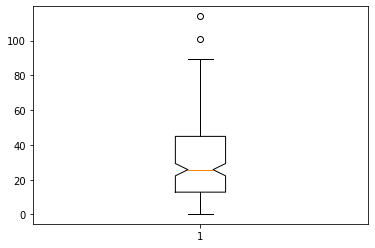

In [88]:
plt.boxplot(df_marketing['newspaper'],1)
plt.show()

##### here there are two outlires around 100 and 110 and median is around 25 and 25% is at 15 and 75% at near 45

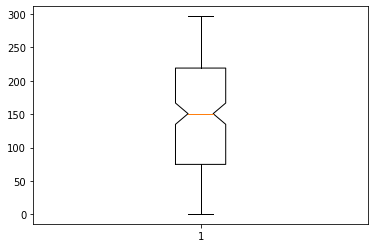

In [89]:
plt.boxplot(df_marketing['TV'],1)
plt.show()

##### here there are no outlires  and median is around 150 and 25% is at 75 and 75% at near 220

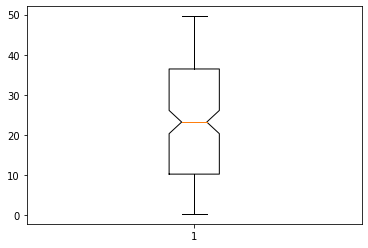

In [90]:
plt.boxplot(df_marketing['radio'],1)
plt.show()

##### here there are no outlires and median is around 23 and 25% is at 10 and 75% at near 38

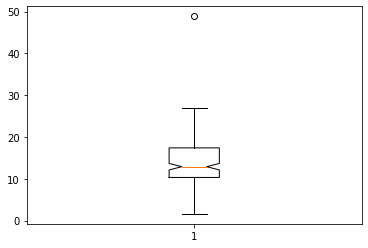

In [91]:
plt.boxplot(df_marketing['sales'],1)
plt.show()

##### here there is one outlires around 50 and median is around 15 and 25% is at 12 and 75% at near 18

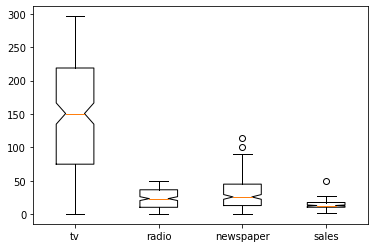

In [92]:
plt.boxplot(np.array(df_marketing[['TV','radio','newspaper','sales']]),1)
plt.xticks([1,2,3,4],['tv','radio','newspaper','sales'])
plt.show()

#### b) Next you need to create a figure and create two subplots(contained in the same row) on it with the following details -

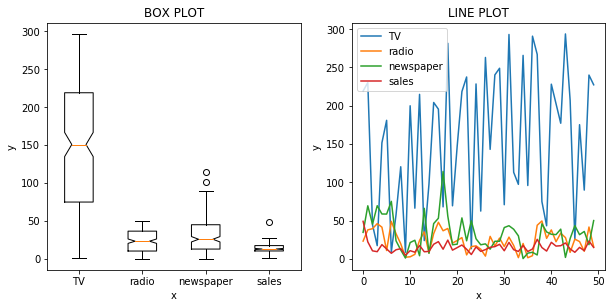

In [93]:
fig = plt.figure(figsize=(10,10))
a1 = fig.add_subplot(221)

a1.boxplot(np.array(df_marketing[['TV','radio','newspaper','sales']]),1)
a1 = plt.xticks([1,2,3,4], ['TV','radio', 'newspaper','sales'])
a1 = plt.title('BOX PLOT')
a1 = plt.xlabel('x')
a1 = plt.ylabel('y')
a2 = fig.add_subplot(222)
a2.plot(np.array(df_marketing[['TV','radio','newspaper','sales']][:50]))
#df_marketing.plot()
a2 = plt.xlabel('x')
a2 = plt.ylabel('y')
a2 = plt.title('LINE PLOT')
a2=plt.legend(labels = ['TV', 'radio', 'newspaper','sales'])
plt.show()

#### c) Create the distribution plot along with kde plot for the Sales data and explain it in your words.

Text(0.5, 1.0, 'KDE Plot')

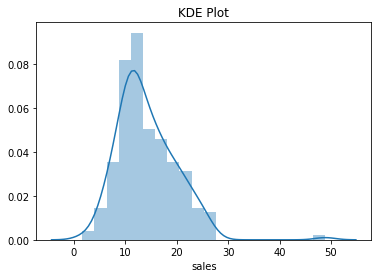

In [94]:
sns.distplot(df_marketing['sales'])
plt.title('KDE Plot')

#### d) Create the Scatter plot using the dataframe plot function keeping the Sales on Y-axis and expenditure on tv on x-axis.


Text(0, 0.5, 'Sales')

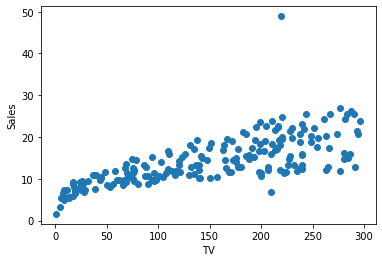

In [95]:
plt.scatter(df_marketing['TV'], df_marketing['sales'])
plt.xlabel('TV')
plt.ylabel('Sales')

##### we can see that with increase in advetisement in tv the sales is also increasing

#### e) Create 3 subplots (in a single row) in a figure for the following -

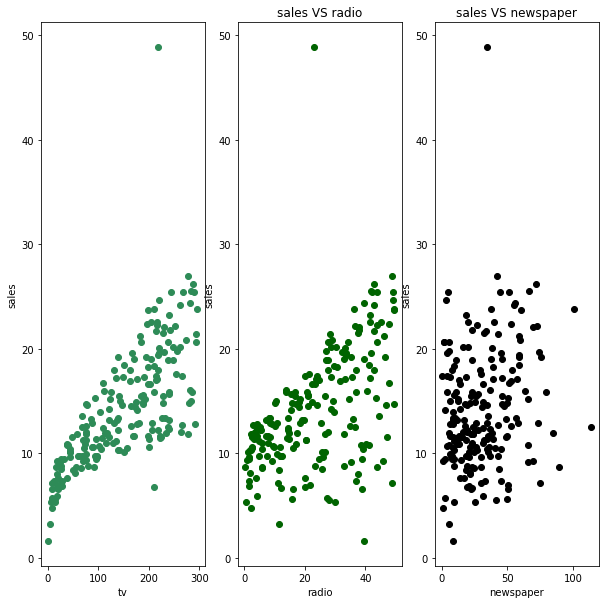

In [99]:
fig = plt.figure(figsize=(10,10))
a1 = fig.add_subplot(131)
a1.scatter(df_marketing['TV'], df_marketing['sales'], color = 'seagreen')
a1 = plt.xlabel('tv')
a1 = plt.ylabel('sales')
a2 = fig.add_subplot(132)
a2.scatter(df_marketing['radio'], df_marketing['sales'], color = 'darkgreen')
a2 = plt.xlabel('radio')
a2 = plt.ylabel('sales')
a2 = plt.title('sales VS radio')
a2 = fig.add_subplot(133)
a2.scatter(df_marketing['newspaper'], df_marketing['sales'], color = 'black')
a2 = plt.xlabel('newspaper')
a2 = plt.ylabel('sales')
a2 = plt.title('sales VS newspaper')
plt.show()

#### f) Create the pairplot for Sales with different marketing expenses using seaborn.

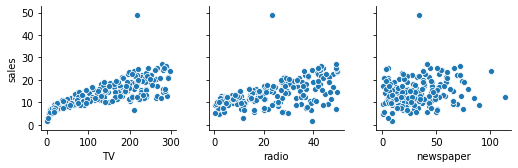

In [105]:
a=sns.pairplot(df_marketing, x_vars = ['TV', 'radio', 'newspaper'], y_vars = ['sales'])


## Task 5 – Creating Prediction Model using Simple Linear Regression

#### a) Add a new column “TotalAdvt” to the dataframe df_marketing, which will have the total of all the three marketing expenditures (tv, radio and news-paper)

In [106]:
df_marketing['TotalAdvt']=df_marketing['TV']+df_marketing['newspaper']+df_marketing['radio']

In [107]:
df_marketing

,Sno,TV,radio,newspaper,sales,TotalAdvt
0,1,219.0,23.122167,34.5,48.9,276.622167
1,2,230.1,37.800000,69.2,22.1,337.100000
2,3,44.5,39.300000,45.1,10.4,128.900000
3,4,17.2,45.900000,69.3,9.3,132.400000
4,5,151.5,41.300000,58.5,18.5,251.300000
...,...,...,...,...,...,...
199,200,38.2,3.700000,13.8,7.6,55.700000
200,201,94.2,4.900000,8.1,9.7,107.200000
201,202,177.0,9.300000,6.4,12.8,192.700000
202,203,283.6,42.000000,66.2,25.5,391.800000


#### b) Fit a Simple Linear Regression for Sales and TotalAdvt and find out the values of intercept slope and the R-square value. Describe the model in your terms. The model should be named simple_model.

In [147]:
from sklearn.model_selection import train_test_split
a=df_marketing[['TotalAdvt']]
b=df_marketing['sales']
train_x, test_x, train_y, test_y = train_test_split(a, b, test_size = 0.1)

In [113]:
from sklearn import linear_model, metrics
simple_model=linear_model.LinearRegression()
simple_model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [114]:
print(simple_model.intercept_)

4.108155209331631


In [115]:
print(simple_model.coef_[0])

0.050117176271198556


In [116]:
print('R-square value:',simple_model.score(train_x, train_y))

R-square value: 0.6337405370904288


##### r value seams less 

#### c) What will be the Sales using the above Model if total expenditure on advertisements is Rupees 50,000. Show the steps done to find out the Sales value. (write the mathematical equation used )


In [121]:
y=simple_model.intercept_
z=simple_model.coef_[0]
print('The predicted sales is:',z * 50 +y)

The predicted sales is: 6.614014022891559


##### formula used is z*cost +y

#### d) Perform part c) using the predict method for the model created in part b)

In [122]:
simple_model.predict([[50]])

array([6.61401402])

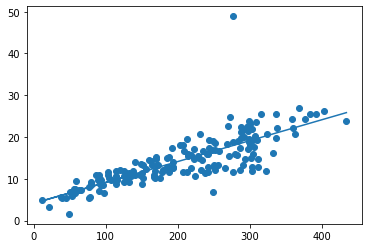

In [124]:
plt.scatter(train_x, train_y)
plt.plot(train_x, z * train_x + y)

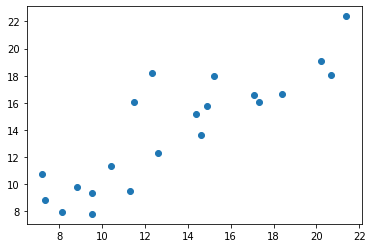

In [126]:
predict= simple_model.predict(test_x)
plt.scatter(test_y, predict)

#####  prediction is not that good as there is more scatering

## Task 6 –  Multivariate Prediction Model using Linear Regression

#### a) Fit a Linear Regression for Sales while keeping tv, radio and newspaper as three different x-parameters. The model should be named multi_model.

In [146]:
m=df_marketing[['TV', 'radio','newspaper']]
Train_x, Test_x, Train_y, Test_y = train_test_split(m, b, test_size = 0.2)
multi_model=linear_model.LinearRegression()
multi_model.fit(Train_x, Train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### b) Find out the values of intercept slopes and the R-square value. Describe the model in your terms

In [131]:
multi_model.intercept_


2.800379846837405

In [132]:
multi_model.coef_

array([0.0463289 , 0.18256122, 0.00352027])

In [133]:
print('R-square value:', multi_model.score(Train_x, Train_y))

R-square value: 0.880258136639566


##### r value is more so this model is good

#### c) Write the Mathematical equation for Sales for this Model. Predict Sales for the below mentioned Expenditures

In [135]:
aa= np.array(multi_model.coef_)
ab= multi_model.intercept_
print("for tv Rupees 90000, radio Rupees 3000 and newspaper Rupees 45000: ", aa[0] * 90 + aa[1] * 3 + aa[2] * 45 + ab)
print("for tv Rupees 290000 and newspaper Rupees 80000: ", aa[0] * 290 + aa[1] * 0 + aa[2] * 80 + ab)

for tv Rupees 90000, radio Rupees 3000 and newspaper Rupees 45000:  7.676077030009712
for tv Rupees 290000 and newspaper Rupees 80000:  16.51738334101109


##### formula used is aa[0] * (Cost On Advertisement by TV) + M[1] * (Cost On Advertisement by radio) + M[2] * (Cost On Advertisement by newspapers) + multi_model.intercept_

#### d) Perform part b) using  the predict method for the model

In [136]:
multi_model.predict([[90, 3, 45]])

array([7.67607703])

In [137]:
multi_model.predict([[290, 0, 80]])

array([16.51738334])

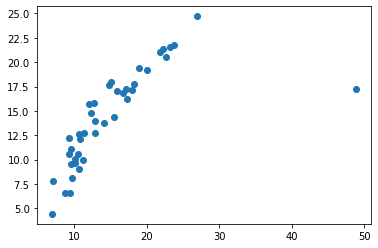

In [138]:
Predict= multi_model.predict(Test_x)
plt.scatter(Test_y, Predict)

##### this prediction is better as there is less scatering

## Task 7 – Model Performance

#### a) For both the simple regression model (stored in simple_model) and Multi-variate model (stored in multi_model) find out the predicted value of Y, for the given  X-values and store it in simple_y and multi_y.

In [148]:
simple_y = simple_model.predict(a)
multi_y = multi_model.predict(m)

#### b) Find out the Mean Squared Error, using the metrics module of sklearn, for both the models (using actual and predicted values of Sales). Store the result in simple_mse and multi_mse respectively.

In [151]:
simple_mse=metrics.mean_squared_error(b, simple_y)
multi_mse= metrics.mean_squared_error(b, multi_y)
print("Error in Simple Model:",simple_mse)
print("Error in Multivariate Model:",multi_mse)

Error in Simple Model: 11.880306639547275
Error in Multivariate Model: 8.18011191653423


#### c) Explain the result in step b) in your words describing which model is better and why?

# here error in multivariate is less so it is better